In [33]:
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [67]:
ace_df = pd.read_csv("MoleculeACE_results.csv")
ace_df['method'] = ace_df.algorithm+"_"+ace_df.descriptor
ace_df = ace_df.query("method == 'SVM_ECFP'")[["dataset","method","rmse","cliff_rmse"]]

In [68]:
median_df = pd.read_csv("median.csv")

In [69]:
gp_df = pd.read_csv("molecule_ace_gp_results.csv")
gp_df

,Name,Descriptors,R2,RMSE,R2_cliff,RMSE_cliff
0,CHEMBL3979_EC50,morgan,0.596723,0.501816,0.404807,0.590423
1,CHEMBL3979_EC50,morgan_rdkit,0.615922,0.477925,0.440087,0.555426
2,CHEMBL3979_EC50,morgan_counts,0.594368,0.504746,0.421759,0.573607
3,CHEMBL3979_EC50,morgan_counts_rdkit,0.615922,0.477925,0.440087,0.555426
4,CHEMBL262_Ki,morgan,0.608071,0.452148,0.597547,0.427768
...,...,...,...,...,...,...
115,CHEMBL204_Ki,morgan_counts_rdkit,0.807777,0.458820,0.767613,0.580836
116,CHEMBL218_EC50,morgan,0.578159,0.442716,0.457113,0.540271
117,CHEMBL218_EC50,morgan_rdkit,0.589611,0.430698,0.463512,0.533903
118,CHEMBL218_EC50,morgan_counts,0.569224,0.452093,0.440649,0.556656


In [70]:
gp_df = pd.read_csv("molecule_ace_gp_results.csv")
gp_df = gp_df[["Name","Descriptors","RMSE","RMSE_cliff"]]
gp_df.columns = ["dataset","method","rmse","cliff_rmse"]
gp_df = gp_df.query("method == 'morgan_counts_rdkit'")

In [71]:
combo_df = pd.concat([ace_df,median_df,gp_df])

Text(0.5, 0, 'Dataset')

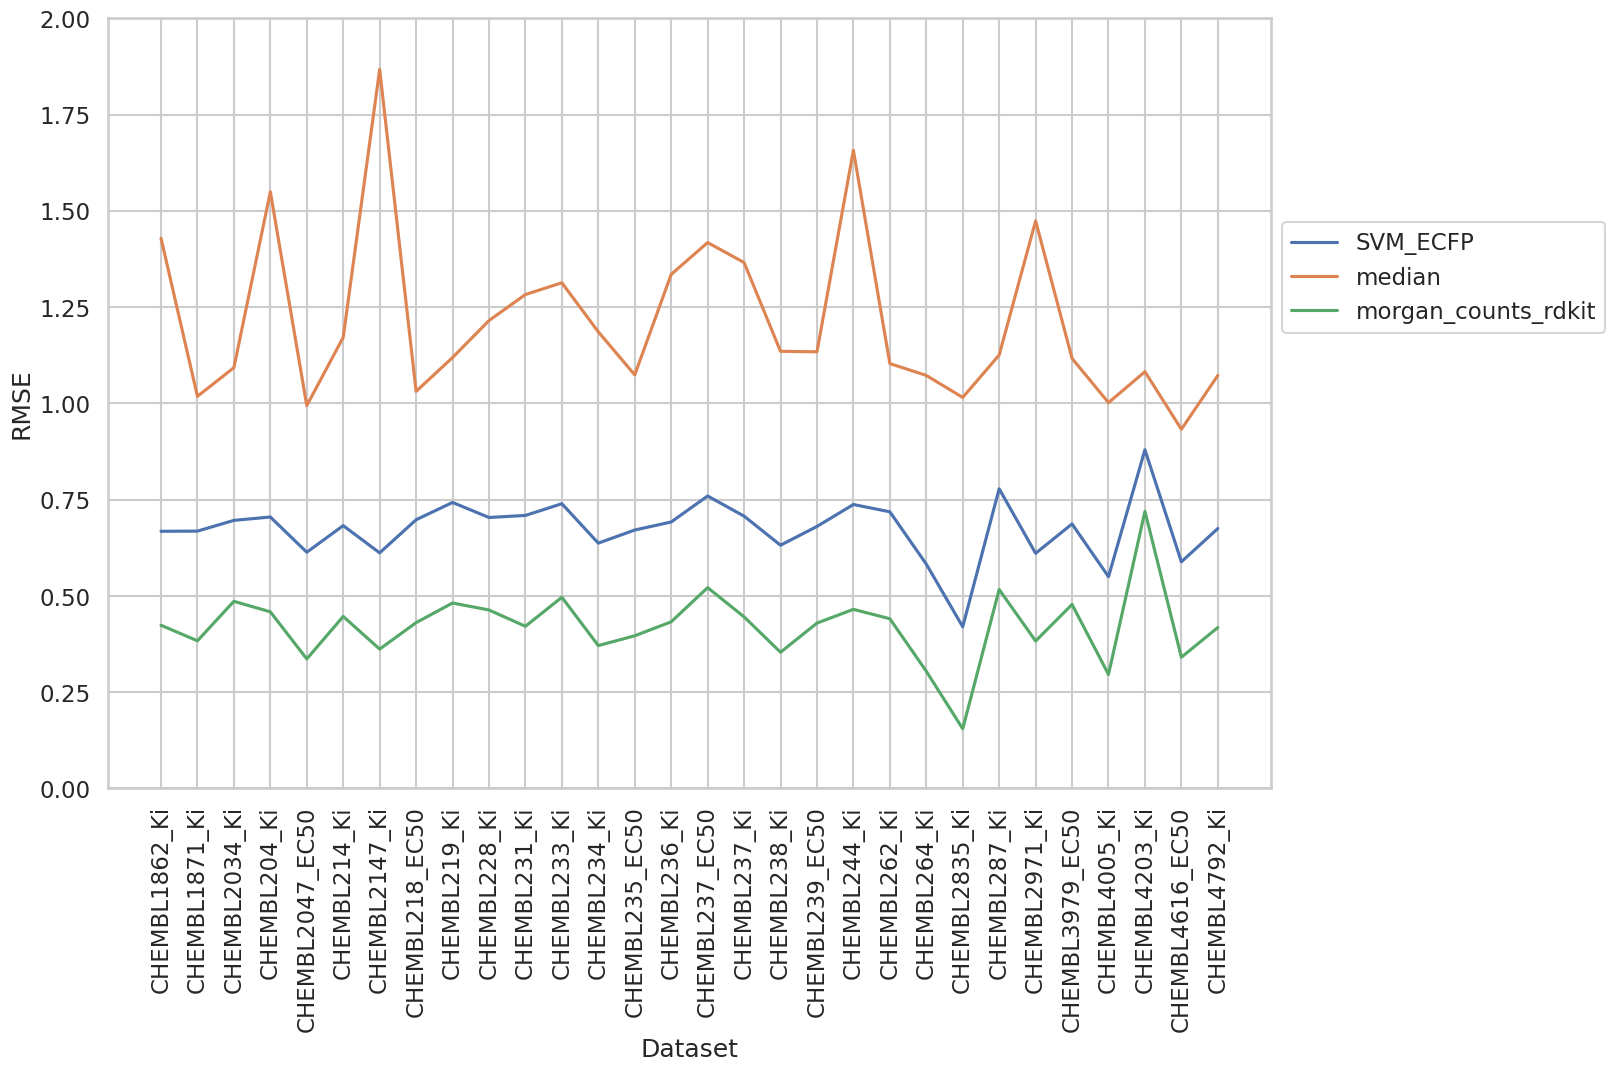

In [73]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')
ax = sns.lineplot(x="dataset",y="rmse",hue="method",data=combo_df)
ax.set_ylim([0,2])
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.75), ncol=1)
ax.set_ylabel("RMSE")
ax.set_xlabel("Dataset")

Text(0.5, 0, 'Dataset')

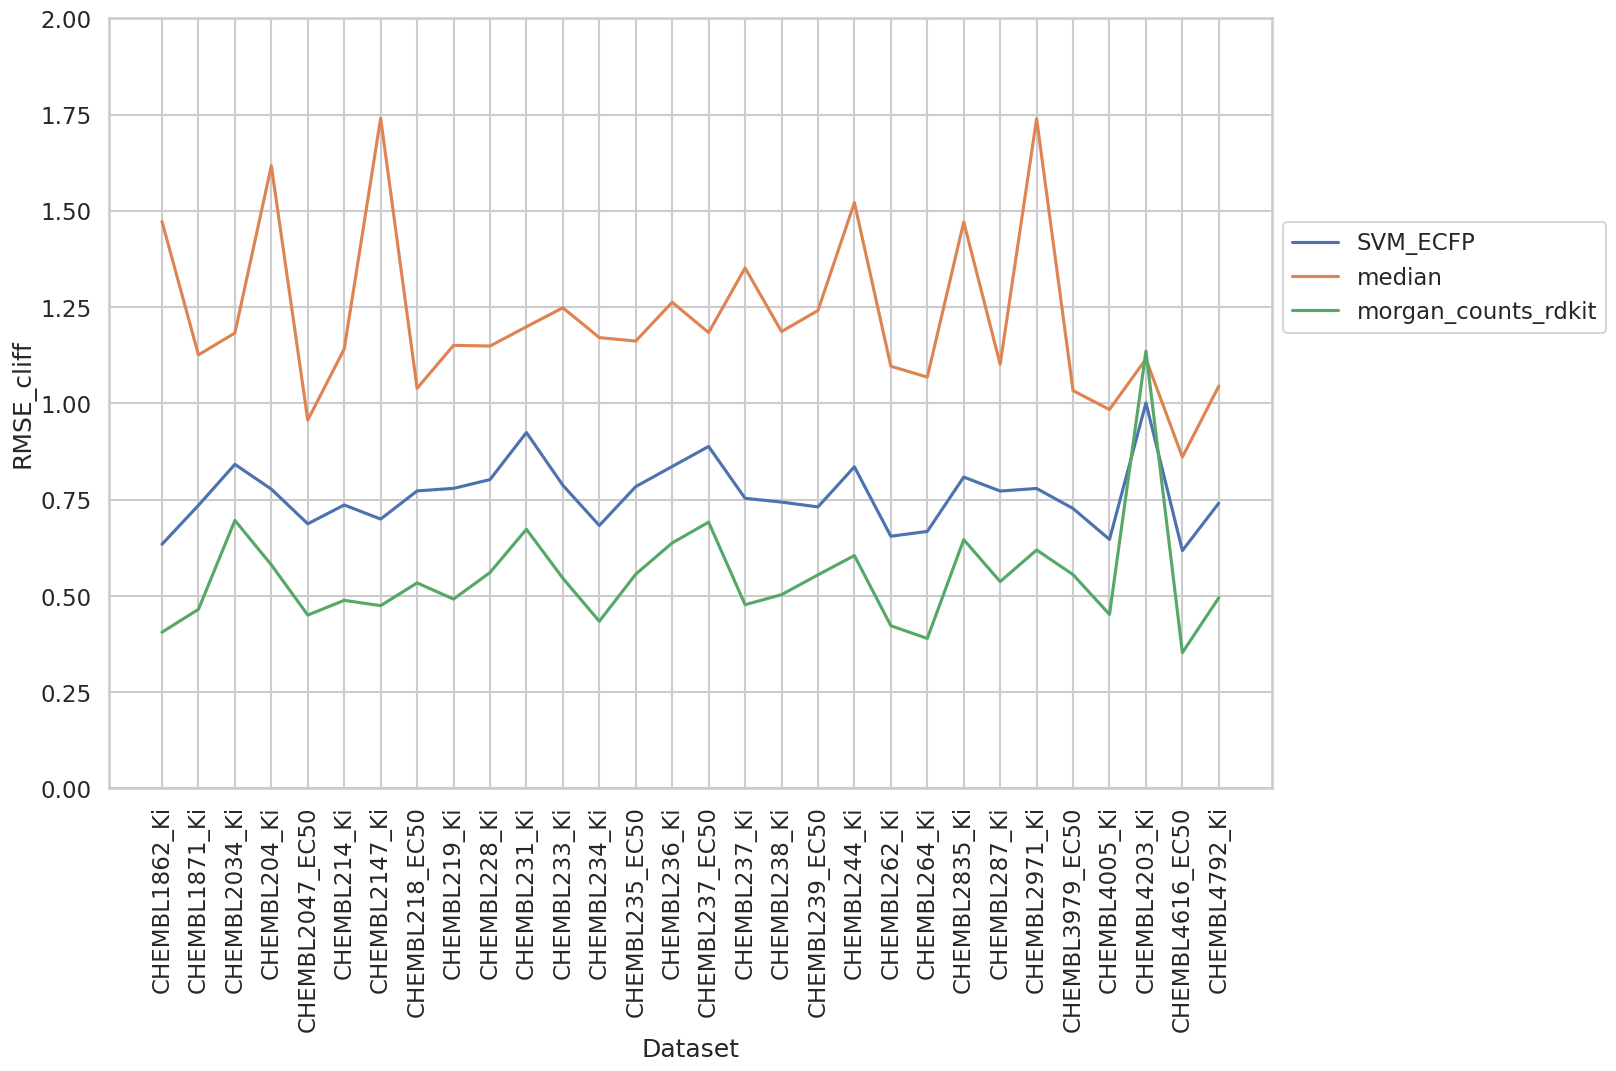

In [74]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')
ax = sns.lineplot(x="dataset",y="cliff_rmse",hue="method",data=combo_df)
ax.set_ylim([0,2])
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.75), ncol=1)
ax.set_ylabel("RMSE_cliff")
ax.set_xlabel("Dataset")